### Import dataset

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, KFold

In [37]:
df = pd.read_csv('./SRC/aerogerador2.dat', sep=' ')

In [38]:
df.columns = ['Null', 'Speed', 'Potency']

In [39]:
df = df.drop(columns='Null')

### Analisy and plot

<AxesSubplot:xlabel='Speed', ylabel='Potency'>

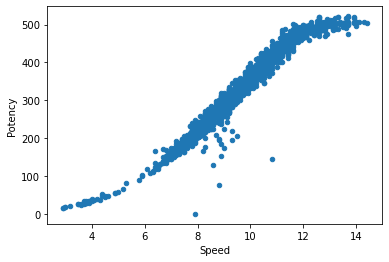

In [40]:
df.plot.scatter('Speed', 'Potency')

### Apply linear regression model

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Potency'), df['Potency'], test_size=0.25, shuffle=True)

In [42]:
model = LinearRegression(normalize=True).fit(X_train, y_train)
predict = model.predict(X_test)

### Results

In [43]:
mean_absolute_error(y_test, predict)

15.759382060383697

In [44]:
mean_squared_error(y_test, predict)

524.0604392412774

In [45]:
np.sqrt(mean_squared_error(y_test, predict))

22.892366396711317

### Plot results

/home/geovanebarros/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speed'>

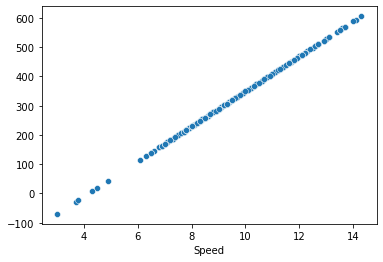

In [46]:
sb.scatterplot(X_test['Speed'], predict)

### Polynomial regression

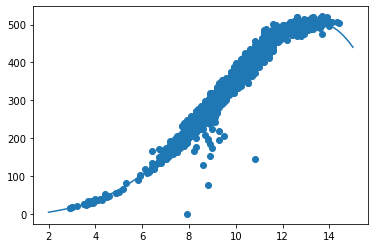

In [59]:
test = np.polyfit(df['Speed'], df['Potency'], 4)
mymodel = np.poly1d(test)

myline = np.linspace(2, 15, 100)

plt.scatter(df['Speed'], df['Potency'])
plt.plot(myline, mymodel(myline))
plt.show()

The curve

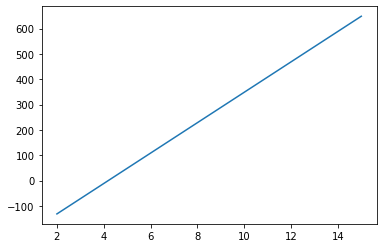

In [48]:
plt.plot(myline, mymodel(myline))

### Poly metrics

In [60]:
y_predict  = []
for i in X_test['Speed'].values:
    y_predict.append(mymodel(i))

Metrics

In [61]:
mean_absolute_error(y_test, y_predict)

11.096498261932217

In [62]:
mean_squared_error(y_test, predict)

524.0604392412774

In [63]:
np.sqrt(mean_squared_error(y_test, predict))

22.892366396711317

### Results

In the graph, we see that the data closely resembled a third-degree curve. However, used as two regression techniques for this dataset. As expected, the polynomial regression had better results, however the linear regression had interesting results, not having a very high error. This fact is due to the fact that between speed values ​​5 and 12, the power value remains as a straight line.